# Percobaan II
Nama : Muhammad Fadhil Syahputra

NIM : 2211014210002

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa 
from IPython.display import Audio
from itertools import cycle

## Sampling


### Pengamatan Pengaruh Pemilihan Frekuensi Sampling Secara Visual






1. Bangkitkan sebuah gelombang sinus diskrit mengikuti script seperti pada praktikum 1
langkah 4.5.5 no.1, dengan Fs = 10 Hz, t = (0:Fs-1)/Fs , amplitudo = 1, dan f = 2 Hz.
Bagaimana hasilnya ? Pada gambar sinyal yang dihasilkan, jangan lupa beri keterangan
besar frekuensi sampling yang digunakan.

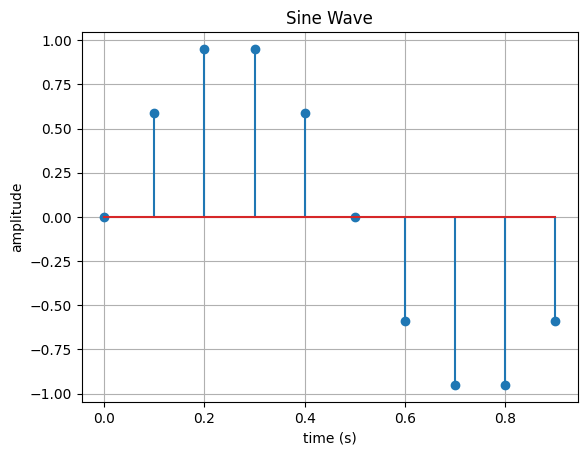

In [22]:
amp = 1
freq = 1
sampling_freq = 10
t = np.arange(0, 1, 1/sampling_freq)
signal = amp * np.sin(2 * np.pi * freq * t)
fig, ax = plt.subplots()
ax.stem(t, signal)
ax.set(xlabel='time (s)', ylabel='amplitude',
       title='Sine Wave')
ax.grid()
plt.show()


2. Lakukan perubahan pada nilai Fs, pada sinyal s1 sehingga bernilai 12, 16, 18, 20, dan Catat apa yang terjadi ? Apa pengaruh jumlah sampel berbeda untuk satu periode
sinyal terbangkit?

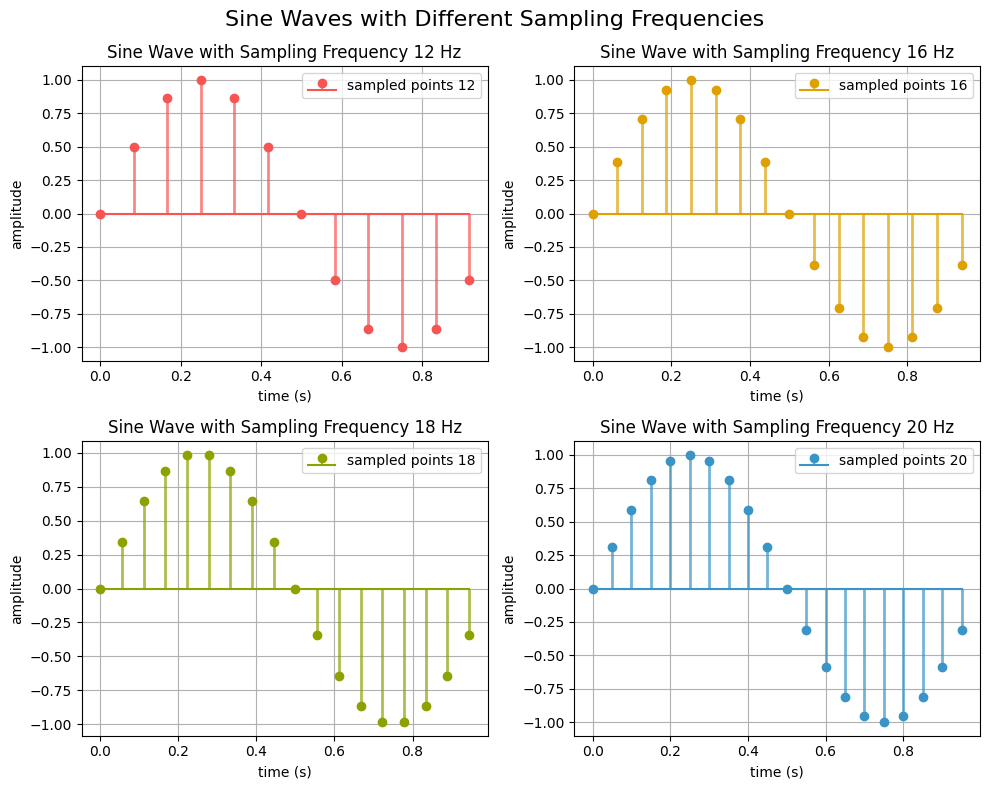

In [42]:
sampling_freqs = [12, 16, 18, 20]
everforest_colors = ['#f85552', '#dfa000', '#8da101', '#3a94c5']
fig, axs = plt.subplots(2,2, figsize=(10, 8))
fig.suptitle('Sine Waves with Different Sampling Frequencies', fontsize=16)
axs = axs.flatten()

for i,(sampling_freq, color) in enumerate(zip(sampling_freqs, everforest_colors)):
    t = np.arange(0, 1, 1/sampling_freq)
    signal = amp * np.sin(2 * np.pi * freq * t)
    markerline, stemlines, baseline = axs[i].stem(t, signal, linefmt=color, markerfmt='o', label=f'sampled points {len(signal)}')
    markerline.set_markerfacecolor(color)
    markerline.set_markeredgecolor(color)
    stemlines.set_color(color)
    stemlines.set_linewidth(2)
    stemlines.set_alpha(0.7)
    baseline.set_color(color)
    axs[i].set(xlabel='time (s)', ylabel='amplitude',
               title=f'Sine Wave with Sampling Frequency {sampling_freq} Hz')
    axs[i].grid()
    axs[i].legend(loc='best')
plt.tight_layout()
plt.show()


### Pengamatan Pengaruh Pemilihan Frekuensi Sampling pada Efek Audio

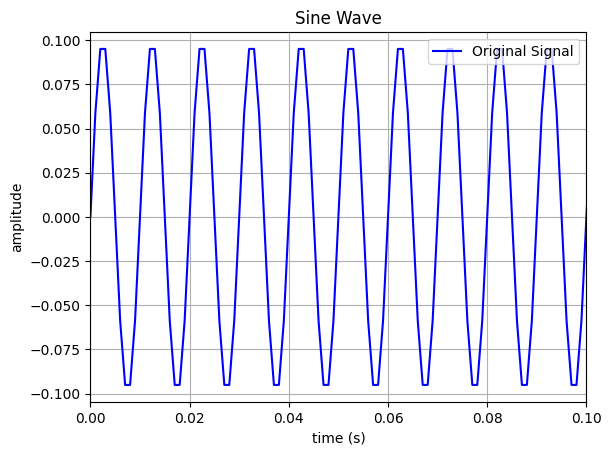

In [68]:
sampling_freq = 1000
freq = 100
t = np.arange(0, 1, 1/sampling_freq)
signal =  0.1*np.sin(2 * np.pi * freq * t)
fig, ax = plt.subplots()
ax.plot(t, signal, color='blue', label='Original Signal')
ax.set(xlabel='time (s)', ylabel='amplitude',
       title='Sine Wave')
ax.grid()
ax.set_xlim(0, 0.1)
plt.legend()
plt.show()

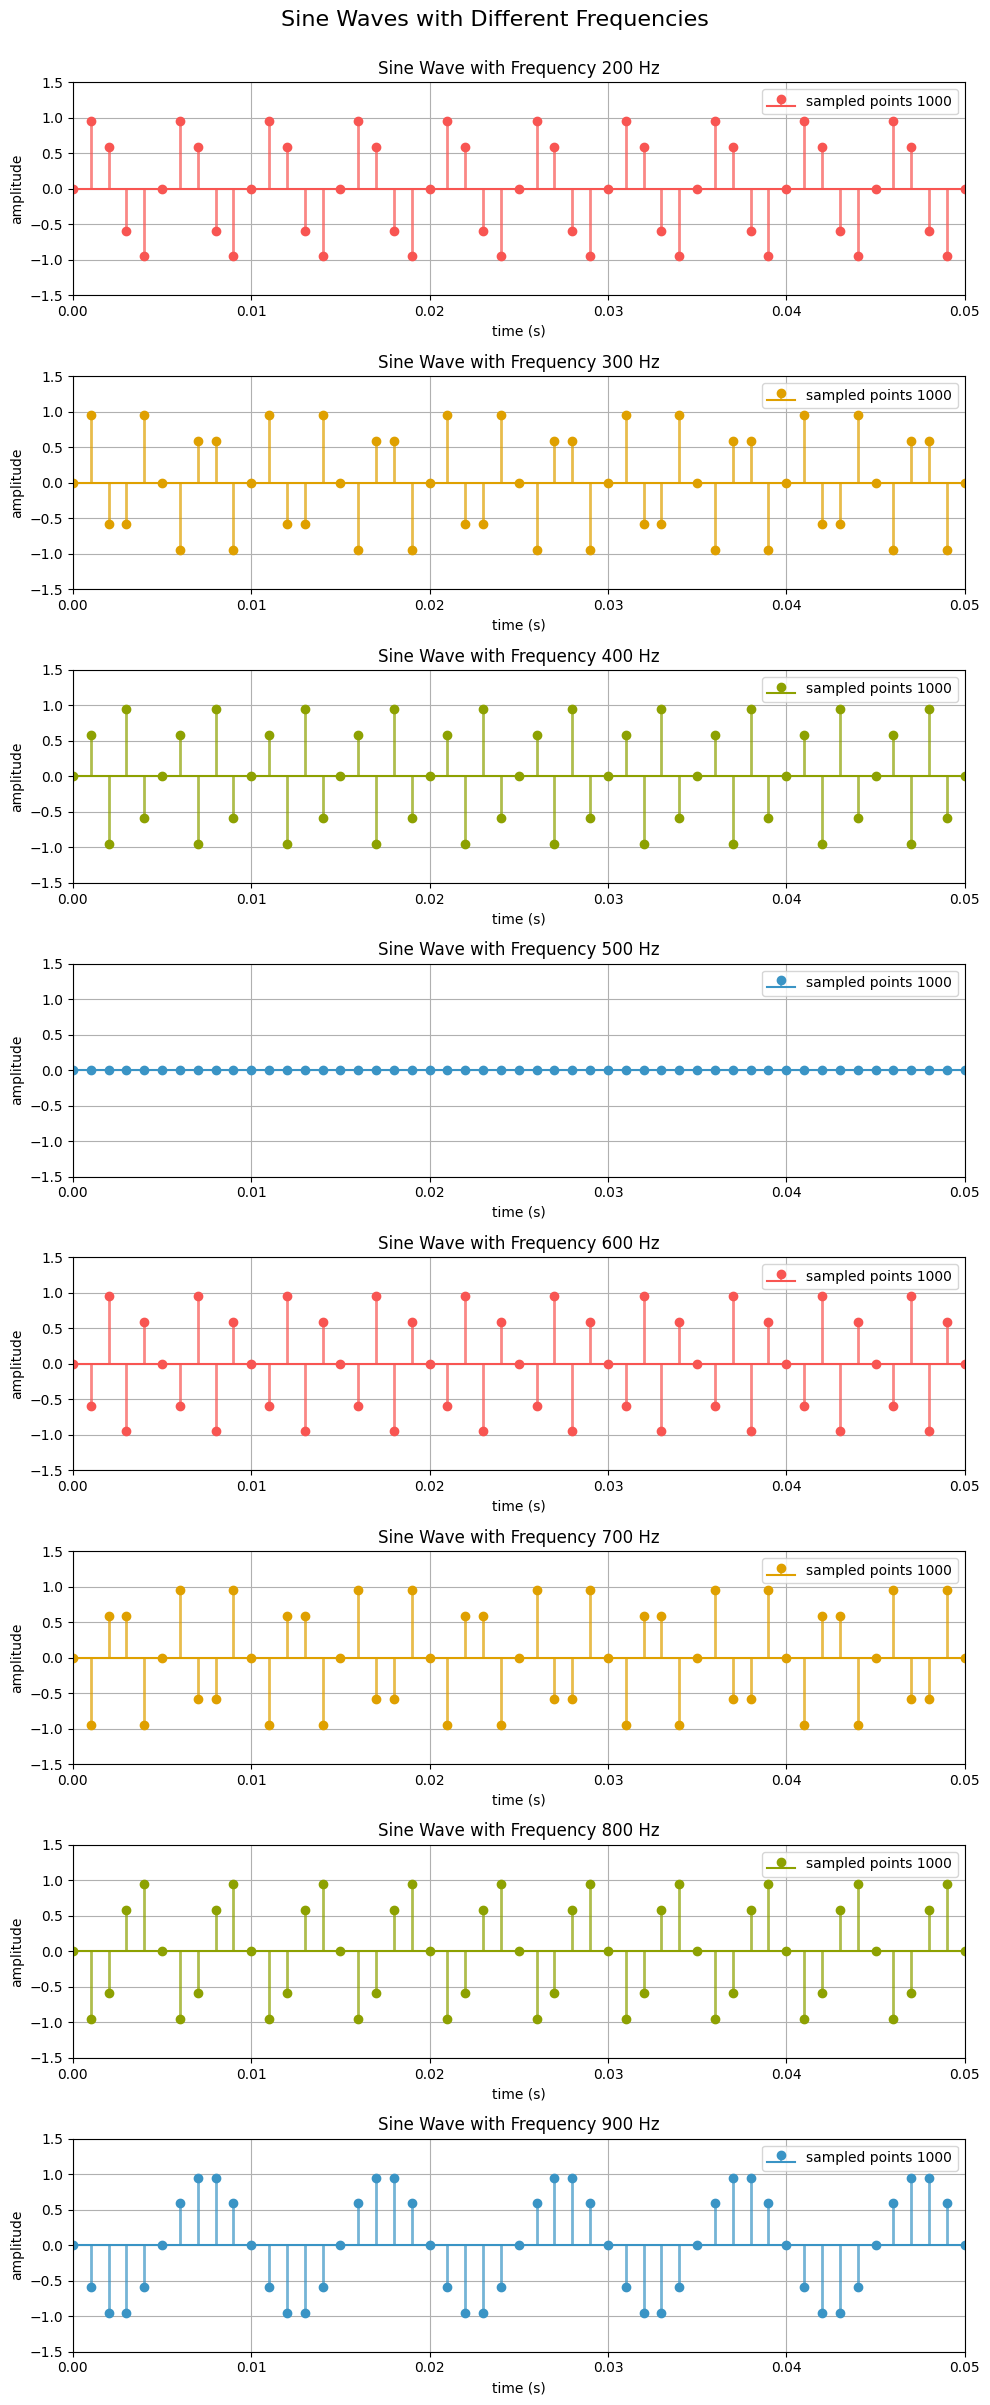

In [97]:
freq = [i*100 for i in range(2, 10)]
sampling_freq = 1000
everforest_colors = ['#f85552', '#dfa000', '#8da101', '#3a94c5']
color_cycle = cycle(everforest_colors)
fig, axs = plt.subplots(8,1)
fig.set_size_inches(10, 24)
fig.suptitle('Sine Waves with Different Frequencies', fontsize=16, y=1)
axs = axs.flatten()
for i, f in enumerate(freq):
    t = np.arange(0, 1, 1/sampling_freq)
    signal = 1*np.sin(2 * np.pi * f * t)
    color = next(color_cycle)
    markerline, stemlines, baseline = axs[i].stem(t, signal, linefmt=color, markerfmt='o', label=f'sampled points {len(signal)}')
    markerline.set_markerfacecolor(color)
    markerline.set_markeredgecolor(color)
    stemlines.set_color(color)
    stemlines.set_linewidth(2)
    stemlines.set_alpha(0.7)
    baseline.set_color(color)
    axs[i].set(xlabel='time (s)', ylabel='amplitude',
               title=f'Sine Wave with Frequency {f} Hz')
    axs[i].grid()
    axs[i].legend(loc='best')
    axs[i].set_xlim(0, 0.05)
    axs[i].set_ylim(-1.5, 1.5)
plt.tight_layout()
plt.show()




### Pengamatan Efek Aliasing pada Audio 1

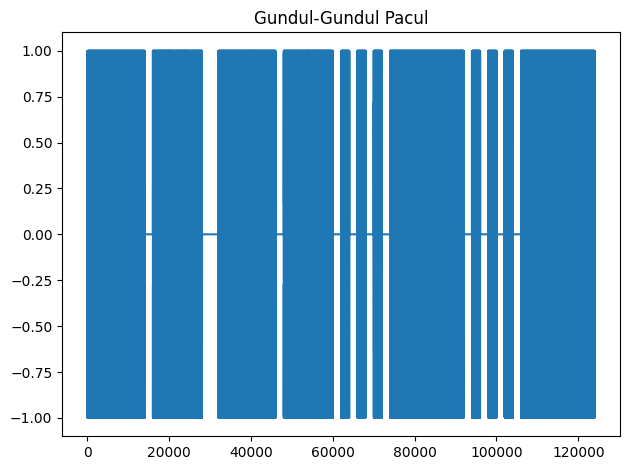

In [ ]:

plt.figure("Lagu Gundul-Gundul Pacul")

Fs = 8000  
t = np.arange(0, 0.25, 1/Fs)  

c  = np.sin(2 * np.pi * 262 * t)
d  = np.sin(2 * np.pi * 294 * t)
e  = np.sin(2 * np.pi * 330 * t)
f_ = np.sin(2 * np.pi * 249 * t)
g  = np.sin(2 * np.pi * 392 * t)
a  = np.sin(2 * np.pi * 440 * t)
b  = np.sin(2 * np.pi * 494 * t)
c1 = np.sin(2 * np.pi * 523 * t)

nol = np.zeros_like(t)

nada1 = np.concatenate([c,e,c,e,f_,g,g,nol,b,c1,b,c1,b,g,nol,nol])
nada2 = np.concatenate([c,e,c,e,f_,g,g,nol,b,c1,b,c1,b,g,nol])
nada3 = np.concatenate([c,nol,e,nol,g,nol,f_,f_,g,f_,e,c,f_,e,c,nol])
nada4 = np.concatenate([c,nol,e,nol,g,nol,f_,f_,g,f_,e,c,f_,e,c])

lagu = np.concatenate([nada1, nada2, nada3, nada4])

plt.plot(lagu)
plt.title("Gundul-Gundul Pacul")
plt.tight_layout()
plt.show()

Audio(lagu, rate=Fs)


### Pengamatan Efek Aliasing pada Audio 2

In [4]:
y, sr = librosa.load('./audio.mp3', sr=None)

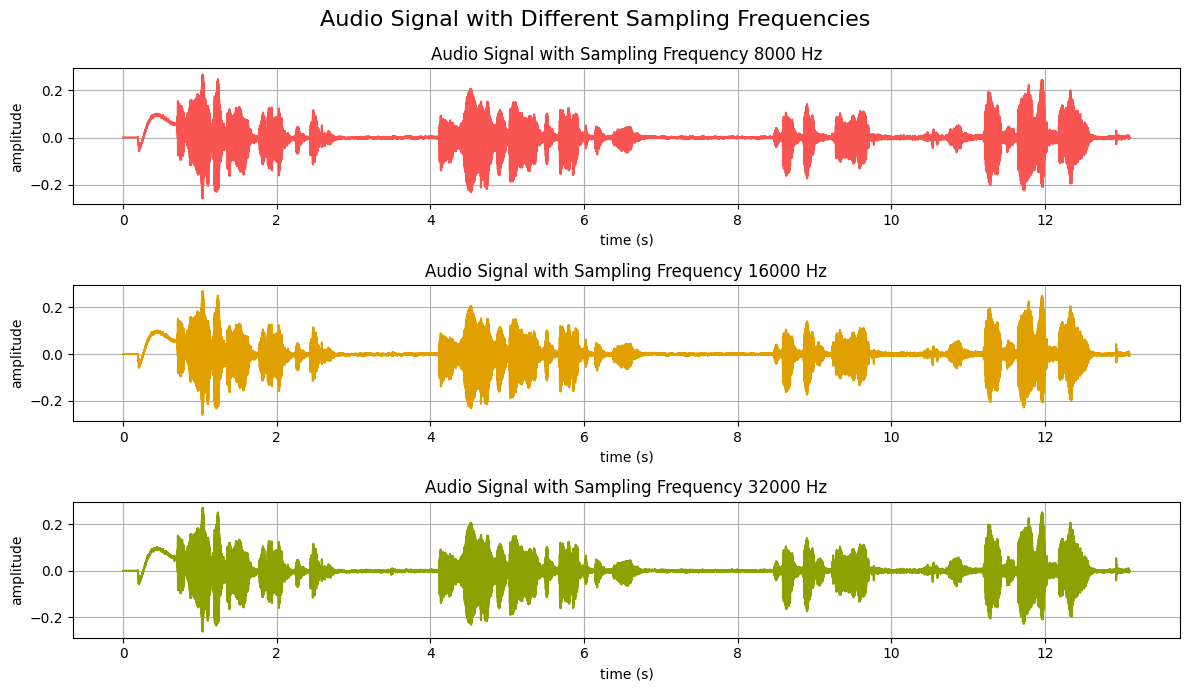

In [17]:
sampling_freqs = [8000, 16000, 32000]
everforest_colors = ['#f85552', '#dfa000', '#8da101']
fig, axs = plt.subplots(3,1)
fig.set_size_inches(12, 7)
fig.suptitle('Audio Signal with Different Sampling Frequencies', fontsize=16)
y_resampleds = []

y_resampled = librosa.resample(y, orig_sr=sr, target_sr=sampling_freqs[0])
t = np.arange(0, len(y_resampled)) / sampling_freqs[0]
y_resampleds.append({
    'y': y_resampled,
    'sr': sampling_freqs[0],
})

axs[0].plot(t, y_resampled, color=everforest_colors[0])
axs[0].set(xlabel='time (s)', ylabel='amplitude',
           title=f'Audio Signal with Sampling Frequency {sampling_freqs[0]} Hz')
axs[0].grid()
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=sampling_freqs[1])
t = np.arange(0, len(y_resampled)) / sampling_freqs[1]
y_resampleds.append({
    'y': y_resampled,
    'sr': sampling_freqs[1],
})
axs[1].plot(t, y_resampled, color=everforest_colors[1])
axs[1].set(xlabel='time (s)', ylabel='amplitude',
           title=f'Audio Signal with Sampling Frequency {sampling_freqs[1]} Hz')
axs[1].grid()
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=sampling_freqs[2])
t = np.arange(0, len(y_resampled)) / sampling_freqs[2]
y_resampleds.append({
    'y': y_resampled,
    'sr': sampling_freqs[2],
})
axs[2].plot(t, y_resampled, color=everforest_colors[2])
axs[2].set(xlabel='time (s)', ylabel='amplitude',
           title=f'Audio Signal with Sampling Frequency {sampling_freqs[2]} Hz')
axs[2].grid()
plt.tight_layout()
plt.show()




In [ ]:
for i, y_resampled in enumerate(y_resampleds):
    print(f"Sampling Frequency: {y_resampled['sr']} Hz")
    print(f"Number of Samples: {len(y_resampled['y'])}")
    print(f"Duration: {len(y_resampled['y']) / y_resampled['sr']} seconds")
    print(f"First 10 Samples: {y_resampled['y'][:10]}")
    print()



Sampling Frequency: 8000 Hz
Number of Samples: 104832
Duration: 13.104 seconds
First 10 Samples: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Sampling Frequency: 16000 Hz
Number of Samples: 209664
Duration: 13.104 seconds
First 10 Samples: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Sampling Frequency: 32000 Hz
Number of Samples: 419328
Duration: 13.104 seconds
First 10 Samples: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Sampling Frequency: 8000 Hz
Sampling Frequency: 16000 Hz
Sampling Frequency: 32000 Hz


In [20]:
for y_resampled in y_resampleds:
    print(f"Sampling Frequency: {y_resampled['sr']} Hz")
    Audio(y_resampled['y'], rate=y_resampled['sr'])

Sampling Frequency: 8000 Hz
Sampling Frequency: 16000 Hz
Sampling Frequency: 32000 Hz


#### Sample Dengan Sampling Rate 8000hz

In [21]:
Audio(y_resampleds[0]['y'], rate=y_resampleds[0]['sr'])

#### Sample Dengan Sampling Rate 16000hz

In [22]:
Audio(y_resampleds[1]['y'], rate=y_resampleds[1]['sr'])

#### Sample Dengan Sampling Rate 32000hz

In [23]:
Audio(y_resampleds[2]['y'], rate=y_resampleds[2]['sr']) 

## Frame Blocking

In [ ]:
alarm, sr = librosa.load('./alarm.wav', sr=None)

44100
